# Exploratory Data Analysis (EDA): Footwear Sales (2018–2026)

Before building models or drawing conclusions, it is essential to develop a strong understanding of the dataset. Exploratory Data Analysis (EDA) helps us examine just that.

In this section, we will:
- Review the overall structure of the dataset (features, data types, and size)
- Identify inconsistent entries
- Detect potential outliers
- Assess whether any variables require cleaning, transformation, or further investigation

By performing this initial analysis, we ensure that the dataset is reliable and well-prepared for deeper statistical analysis and visualization.

--------------------------------------------------------------

## 1. Import the neccesary packages:
Importing the python packages I will be using to better understand the data <br>
Create a .venv from the requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as ws
ws.filterwarnings("ignore")

## 2. Explore the dataset and import the CSV
Import the data from the dataset and start ot analyze it. 

In [3]:
df_sales = pd.read_csv("../../Databases/global_sports_footwear_sales_2018_2026.csv")
df_sales.sample(5)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
6633,ORD106633,2020-02-28,ASICS,Model-562,Lifestyle,Women,6,White,214,30,149.80,2,299.6,Wallet,Retail Store,India,High,3.8
14321,ORD114321,2019-03-22,New Balance,Model-784,Training,Unisex,7,Blue,154,10,138.60,1,138.6,Wallet,Online,Pakistan,Medium,4.6
20187,ORD120187,2019-12-27,Nike,Model-726,Running,Women,9,Grey,90,30,63.00,3,189.0,Cash,Online,UK,Low,3.0
24701,ORD124701,2018-04-17,New Balance,Model-173,Basketball,Men,9,Red,173,5,164.35,2,328.7,Wallet,Retail Store,USA,Low,4.7
8190,ORD108190,2023-05-24,ASICS,Model-242,Basketball,Unisex,10,Blue,152,30,106.40,2,212.8,Bank Transfer,Online,Germany,Low,4.1


Now we’ll check the data types for each column and check the summary of the numerical columns so we can determine our next action.

In [4]:
df_sales.info()

<class 'pandas.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               30000 non-null  str    
 1   order_date             30000 non-null  str    
 2   brand                  30000 non-null  str    
 3   model_name             30000 non-null  str    
 4   category               30000 non-null  str    
 5   gender                 30000 non-null  str    
 6   size                   30000 non-null  int64  
 7   color                  30000 non-null  str    
 8   base_price_usd         30000 non-null  int64  
 9   discount_percent       30000 non-null  int64  
 10  final_price_usd        30000 non-null  float64
 11  units_sold             30000 non-null  int64  
 12  revenue_usd            30000 non-null  float64
 13  payment_method         30000 non-null  str    
 14  sales_channel          30000 non-null  str    
 15  country      

### Key Data Integrity Observations

- No null values were detected across any of the columns.
- All columns contain approximately 30,000 records, indicating that the dataset does not have missing entries.
- The majority of features are stored as string (`str`) data types, which should be carefully considered when designing SQL tables and defining appropriate column types.
- There are no object types which is good for data integrity and keeps a consistent wokflow

In [5]:
df_sales.describe()

,size,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,customer_rating
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,8.500867,139.634633,13.332167,121.029035,2.500200,302.714948,4.001543
std,1.710896,46.062549,9.864198,42.511586,1.121149,179.149272,0.577546
min,6.000000,60.000000,0.000000,42.000000,1.000000,42.000000,3.000000
25%,7.000000,100.000000,5.000000,85.000000,1.000000,156.750000,3.500000
50%,9.000000,140.000000,10.000000,119.200000,3.000000,268.200000,4.000000
75%,10.000000,180.000000,20.000000,153.600000,4.000000,414.000000,4.500000
max,11.000000,219.000000,30.000000,219.000000,4.000000,876.000000,5.000000


### Key Data Description Observations

- Data is daily based on units sold that range from min. 1.0 to max. 4.0 and which is further confirmed by checking the Model-686 sample below.
- From a business standpoint discounts range from 0% to 30% at max
- Customer rating ranges probably from 0 to 5 but the std is so low and the mean is 4 so that means rating mainly are in the upper ratings

In [6]:
df_sales[df_sales["model_name"] == "Model-686"].sample(5)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
29659,ORD129659,2020-03-12,ASICS,Model-686,Gym,Women,6,Grey,75,30,52.50,4,210.00,Cash,Retail Store,India,High,3.7
7443,ORD107443,2018-10-12,New Balance,Model-686,Gym,Unisex,7,Blue,109,15,92.65,1,92.65,Card,Online,India,Low,3.3
18487,ORD118487,2024-10-23,New Balance,Model-686,Lifestyle,Unisex,11,Red,86,5,81.70,1,81.70,Cash,Online,USA,Medium,4.9
18213,ORD118213,2024-12-31,ASICS,Model-686,Training,Men,11,Blue,141,30,98.70,1,98.70,Wallet,Retail Store,UK,High,3.2
14031,ORD114031,2020-07-08,Puma,Model-686,Gym,Unisex,6,Blue,121,15,102.85,1,102.85,Cash,Retail Store,UAE,Medium,4.7


In [7]:
# Change the data type of some of the variables for memory saving purposes
convert_dict = {
    'brand': 'category',
    'category': 'category',
    'gender': 'category',
    'color': 'category',
    'payment_method': 'category',
    'sales_channel': 'category',
    'country': 'category',
    'customer_income_level': 'category'
}

df_sales = df_sales.astype(convert_dict)
df_sales.info()

<class 'pandas.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               30000 non-null  str     
 1   order_date             30000 non-null  str     
 2   brand                  30000 non-null  category
 3   model_name             30000 non-null  str     
 4   category               30000 non-null  category
 5   gender                 30000 non-null  category
 6   size                   30000 non-null  int64   
 7   color                  30000 non-null  category
 8   base_price_usd         30000 non-null  int64   
 9   discount_percent       30000 non-null  int64   
 10  final_price_usd        30000 non-null  float64 
 11  units_sold             30000 non-null  int64   
 12  revenue_usd            30000 non-null  float64 
 13  payment_method         30000 non-null  category
 14  sales_channel          30000 non-null  category
 

Changed the 4.1 MB memory usage to 2.5 MB thanks to the category data type change in many of the variable.

In [8]:
df_sales.sample(5)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
1419,ORD101419,2024-02-25,Reebok,Model-932,Basketball,Men,10,Red,137,0,137.00,4,548.00,Bank Transfer,Online,UK,Low,4.2
16727,ORD116727,2024-12-18,Adidas,Model-292,Gym,Men,11,Red,115,5,109.25,2,218.50,Cash,Retail Store,Pakistan,Medium,3.1
20280,ORD120280,2020-03-29,Puma,Model-671,Gym,Men,10,White,139,30,97.30,1,97.30,Bank Transfer,Online,Pakistan,High,4.7
29645,ORD129645,2020-03-21,Puma,Model-618,Training,Men,8,Blue,121,5,114.95,2,229.90,Cash,Online,Germany,High,4.4
4454,ORD104454,2025-03-31,Reebok,Model-597,Running,Women,8,Blue,101,15,85.85,1,85.85,Card,Online,Pakistan,Low,4.2


## 3. Analysing Normal Distribution in the data
It is neccessary to understand if our variables follow a normal distribution or not

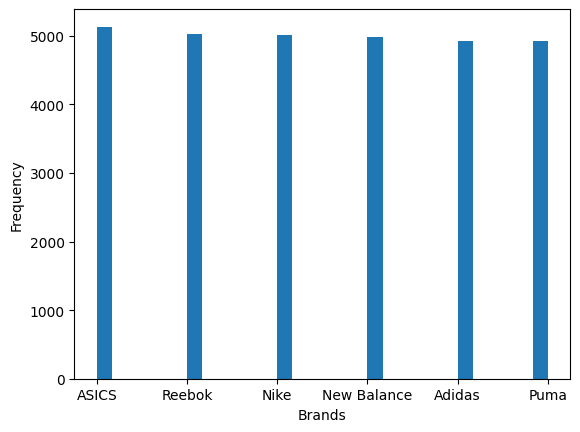

In [9]:
# Check the normal distribution of brands
data_to_plot = df_sales['brand']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Brands')
plt.ylabel('Frequency')

# Display the plot
plt.show()

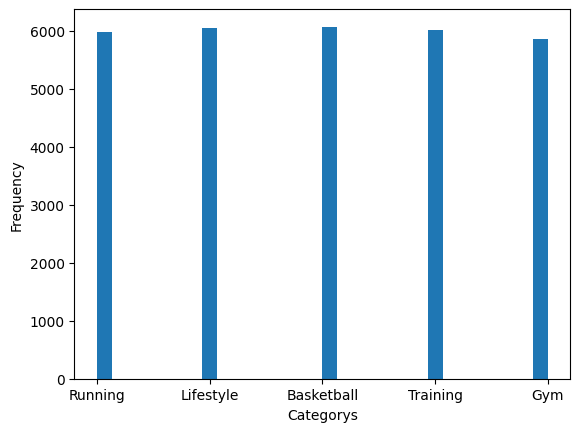

In [10]:
# Check the normal distribution of categorys of shoes
data_to_plot = df_sales['category']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Categorys')
plt.ylabel('Frequency')

# Display the plot
plt.show()

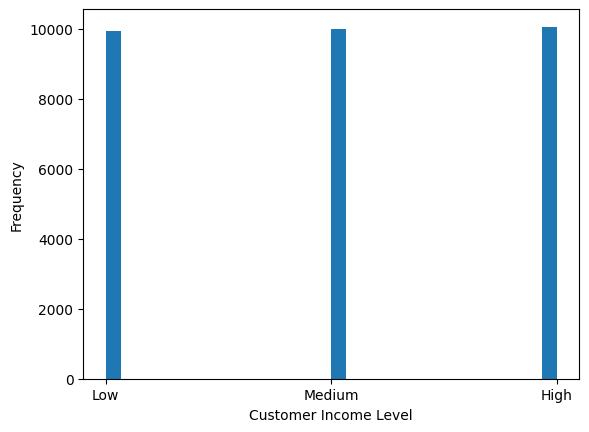

In [11]:
# Check the normal distribution of customer income level    
data_to_plot = df_sales['customer_income_level']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Customer Income Level')
plt.ylabel('Frequency')

# Display the plot
plt.show()

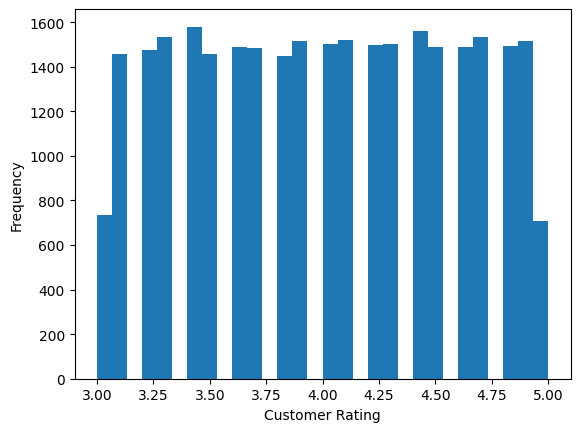

In [12]:
# Check the normal distribution of customer_rating
data_to_plot = df_sales['customer_rating']

plt.hist(x=data_to_plot, bins=30)

# Add x-axis and y-axis titles
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [13]:
df_sales.sample(5)

,order_id,order_date,brand,model_name,category,gender,size,color,base_price_usd,discount_percent,final_price_usd,units_sold,revenue_usd,payment_method,sales_channel,country,customer_income_level,customer_rating
27189,ORD127189,2023-06-12,Puma,Model-708,Running,Unisex,7,Blue,185,10,166.5,3,499.5,Wallet,Retail Store,India,Low,4.0
21522,ORD121522,2021-05-31,ASICS,Model-818,Basketball,Men,10,Grey,67,20,53.6,2,107.2,Bank Transfer,Online,UAE,Medium,4.9
24023,ORD124023,2025-08-31,ASICS,Model-385,Running,Women,10,Blue,208,5,197.6,2,395.2,Card,Online,UAE,Low,4.7
19705,ORD119705,2018-08-25,New Balance,Model-972,Lifestyle,Unisex,9,Blue,62,20,49.6,4,198.4,Wallet,Online,UK,Low,4.0
21991,ORD121991,2021-03-08,Reebok,Model-728,Training,Men,10,Grey,163,20,130.4,4,521.6,Cash,Retail Store,India,Medium,3.7


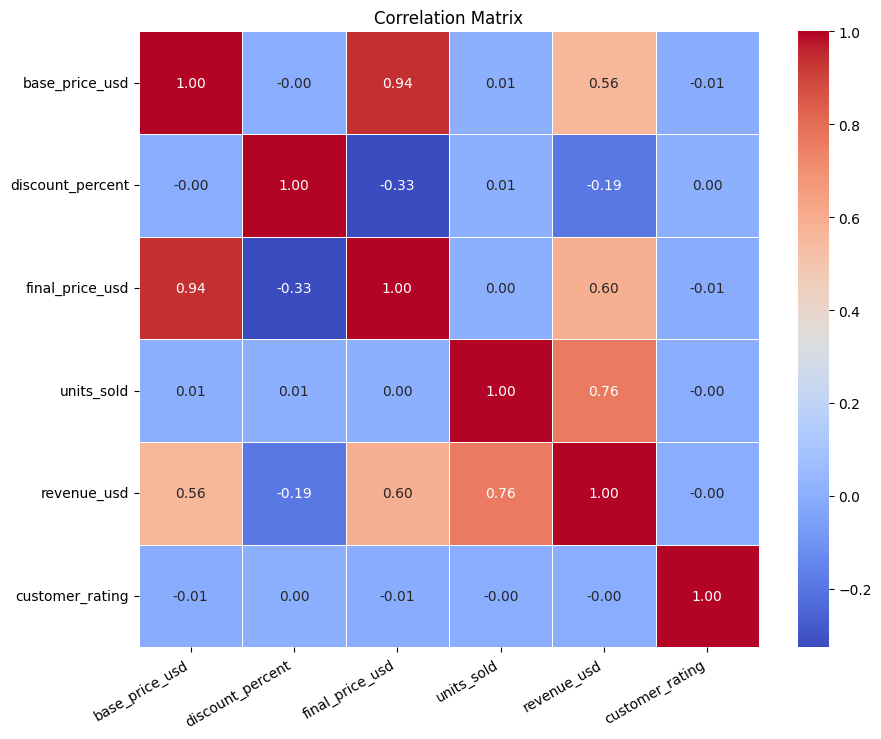

In [15]:
# Import the seaborn package
import seaborn as sns

column_of_interest = ['base_price_usd', 'discount_percent', 'final_price_usd', 'units_sold', 'revenue_usd', 'customer_rating']

# Calculate the matrix
correlation_matrix = df_sales[column_of_interest].corr()

# Display it on a seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()